In [26]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [27]:
import librosa
from simple import simple_fast
from pathlib import Path

examples = list(Path("../data/raw/birdclef-2022/train_audio").glob("**/*.ogg"))
examples[:3]

[WindowsPath('../data/raw/birdclef-2022/train_audio/afrsil1/XC125458.ogg'),
 WindowsPath('../data/raw/birdclef-2022/train_audio/afrsil1/XC175522.ogg'),
 WindowsPath('../data/raw/birdclef-2022/train_audio/afrsil1/XC177993.ogg')]

In [36]:
import IPython.display as ipd

example = examples[151]
data, sample_rate = librosa.load(example)
duration = librosa.get_duration(y=data, sr=sample_rate)
print(f"{example}, {duration:.2f} seconds")
ipd.Audio(data, rate=sample_rate)

..\data\raw\birdclef-2022\train_audio\apapan\XC454885.ogg, 52.27 seconds


In [37]:
data.shape, sample_rate

((1152577,), 22050)

In [38]:
S = librosa.feature.melspectrogram(
    y=data, sr=sample_rate, n_fft=2048, hop_length=80, n_mels=16
)
S.shape

(16, 14408)

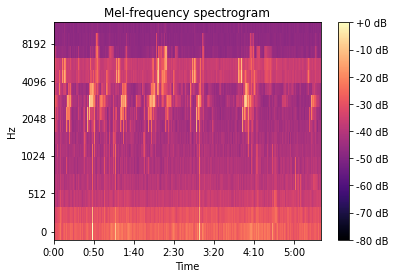

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

sr = sample_rate

S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(img, format="%+2.0f dB")
plt.title("Mel-frequency spectrogram")
plt.show()

In [40]:
5 / (duration / S.shape[1])

1378.2003284813075

In [41]:
mp, pi = simple_fast(S, S, 1400)

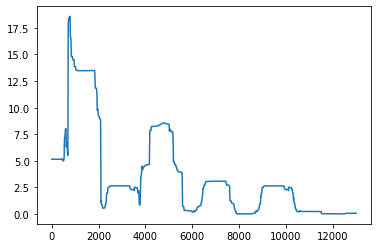

In [45]:
plt.plot(mp)

In [42]:
motif = np.argmin(mp)
motif, pi[motif]

(8367, 12460)

In [43]:
def transform_offset(offset_g, duration_y, duration_g, window_g):
    """Transform position in g into a position in y"""
    rate = duration_y / duration_g
    return (
        int(max((offset_g - window_g / 2) * rate, 0)),
        int((offset_g + window_g / 2) * rate),
    )


for x in [motif, pi[motif]]:
    i, j = transform_offset(x, data.shape[0], S.shape[1], 700)
    print(f"{i}, {j}")
    ipd.display(ipd.Audio(data[int(i) : int(j)], rate=sample_rate))

641324, 697321


968747, 1024743
